<a href="https://colab.research.google.com/github/Mbigdeli2003/RL_training/blob/main/RL_TA_Session_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MDP RL TA session one

Summary of the Teaching Session:
Step 1: We defined the environment, including the states, actions, rewards, and transition matrix.
Step 2: We implemented value iteration to compute the value function and Q-values.
Step 3: We extracted the optimal policy based on the value iteration results.
Step 4: We simulated an episode where the agent follows the optimal policy and accumulates rewards.
Step 5: We visualized the Q-values, optimal policy, and accumulated rewards to help students understand the behavior of the agent.

##1. Import Libraries:

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

##Step 1: Setting up the MDP Environment
Explanation:
States: We have a 2x2 grid, so there are 4 states in total. Each state represents a position in the grid.

State 0: Top-left corner.
State 1: Top-right corner.
State 2: Bottom-left corner.
State 3: Bottom-right corner (goal state).
Actions: The agent can choose from 4 actions in each state:

up: Move upward.
down: Move downward.
left: Move left.
right: Move right.
Rewards: The agent receives a reward of 1 when it reaches the goal state (state 3). All other states have a reward of 0.

Transition Matrix: This matrix tells us how the agent moves from one state to another based on its action. For example, if the agent is in state 0 and chooses to move right, it will move to state 1. If it chooses to move left or up from state 0, it will stay in state 0 because it’s on the edge of the grid.

Here's how to define these components:

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the state space (2x2 grid, so 4 states)
states = [0, 1, 2, 3]  # 0: top-left, 1: top-right, 2: bottom-left, 3: bottom-right

# Set up the action space (up, down, left, right)
actions = ['up', 'down', 'left', 'right']

# Define rewards - only the bottom-right corner (state 3) has a reward
rewards = np.array([0, 0, 0, 1])  # Only the goal state (state 3) gives a reward of 1

# Define the transition matrix for the 2x2 grid
# Each action leads to a specific next state based on the grid structure
transition_matrix = {
    0: {'up': 0, 'down': 2, 'left': 0, 'right': 1},  # Top-left corner (state 0)
    1: {'up': 1, 'down': 3, 'left': 0, 'right': 1},  # Top-right corner (state 1)
    2: {'up': 0, 'down': 2, 'left': 2, 'right': 3},  # Bottom-left corner (state 2)
    3: {'up': 1, 'down': 3, 'left': 2, 'right': 3},  # Bottom-right corner (state 3, goal)
}


##Step 2: Implementing Value Iteration
Explanation:
In Value Iteration, we compute the value function V for each state, which tells us how good it is to be in each state. The value function is updated iteratively based on the rewards and transitions, until the values converge (i.e., they stop changing significantly).

We also compute the action-value table (Q), which tells us the expected future reward for taking each action in each state. Finally, we extract the optimal policy, which tells the agent which action to take in each state.

In [ ]:
# Value Iteration with Q-values computation
def value_iteration(states, actions, transition_matrix, rewards, gamma=0.9, theta=1e-6):
    V = np.zeros(len(states))  # Initialize value function for all states
    Q = np.zeros((len(states), len(actions)))  # Initialize action-value table (Q-values)

    # Run value iteration until the value function converges
    while True:
        delta = 0  # Track change in value function for convergence check

        for s in states:
            v = V[s]  # Current value before update
            action_values = []  # Store the Q-values for each action at state s

            for idx, a in enumerate(actions):
                next_state = transition_matrix[s][a]  # Find the next state after taking action
                action_value = rewards[s] + gamma * V[next_state]  # Calculate Q-value for action a
                action_values.append(action_value)

                Q[s][idx] = action_value  # Store Q-value in action-value table

            V[s] = max(action_values)  # Update the value function with the best action's value
            delta = max(delta, abs(v - V[s]))  # Track the maximum change for convergence

        if delta < theta:  # Stop when the value function converges
            break

    return V, Q  # Return the value function and action-value table

# Run value iteration
V, Q = value_iteration(states, actions, transition_matrix, rewards)


##Step 3: Extracting the Optimal Policy
Explanation:
Once the value iteration is complete, we can extract the optimal policy, which tells the agent which action to take in each state. The best action in each state is the one that maximizes the Q-value.

In [ ]:
# Extract the optimal policy based on the value function and Q-values
def extract_policy(states, actions, Q):
    policy = {}  # Initialize policy dictionary

    for s in states:
        best_action = actions[np.argmax(Q[s])]  # Select the action with the highest Q-value
        policy[s] = best_action  # Store the best action in the policy

    return policy

# Extract the optimal policy
policy = extract_policy(states, actions, Q)
print("Optimal Policy:", policy)


Optimal Policy: {0: 'down', 1: 'down', 2: 'right', 3: 'down'}


##Step 4: Simulate an Episode
Explanation:
We simulate an episode where the agent starts at state 0 and follows the optimal policy to reach the goal at state 3. We'll also accumulate the rewards as the agent transitions between states.

In [ ]:
# Simulate an episode following the optimal policy
def simulate_episode(states, policy, rewards, transition_matrix):
    state = states[0]  # Start at state 0 (top-left)
    accumulated_rewards = []  # Track cumulative rewards over time
    total_reward = 0  # Initialize total reward

    while state != states[-1]:  # Continue until the agent reaches the goal (state 3)
        action = policy[state]  # Follow the policy to choose the best action
        next_state = transition_matrix[state][action]  # Transition to the next state
        total_reward += rewards[state]  # Accumulate reward
        accumulated_rewards.append(total_reward)  # Store cumulative reward

        state = next_state  # Move to the next state

    total_reward += rewards[state]  # Add reward for reaching the terminal state
    accumulated_rewards.append(total_reward)

    return accumulated_rewards

# Simulate an episode
accumulated_rewards = simulate_episode(states, policy, rewards, transition_matrix)


##Step 5: Visualization
Explanation:
We will visualize:

Action-Value Table (Q-values) as a heatmap.
Optimal Policy as a bar chart.
Accumulated Rewards over time as a line plot.

###(a) Plot the Action-Value Table (Q-values):

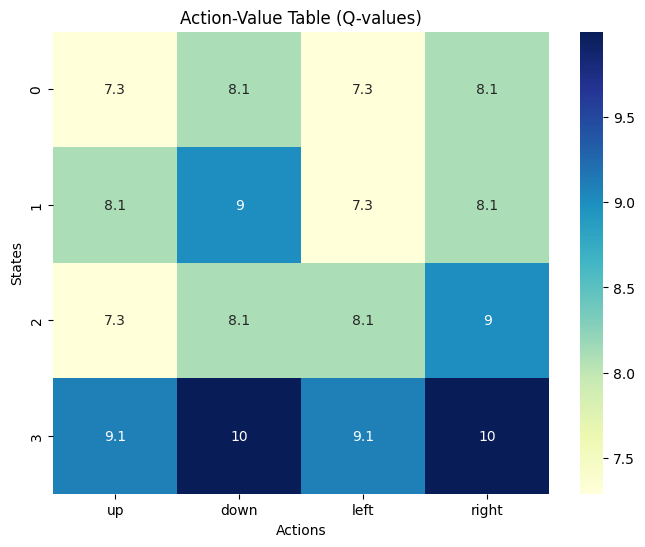

In [ ]:
# Plot the Action-Value Table as a heatmap
def plot_action_values(Q, actions):
    plt.figure(figsize=(8, 6))
    sns.heatmap(Q, annot=True, cmap="YlGnBu", xticklabels=actions, yticklabels=states)
    plt.title('Action-Value Table (Q-values)')
    plt.xlabel('Actions')
    plt.ylabel('States')
    plt.show()

# Call function to plot action-value table
plot_action_values(Q, actions)


###(b) Plot the Optimal Policy:

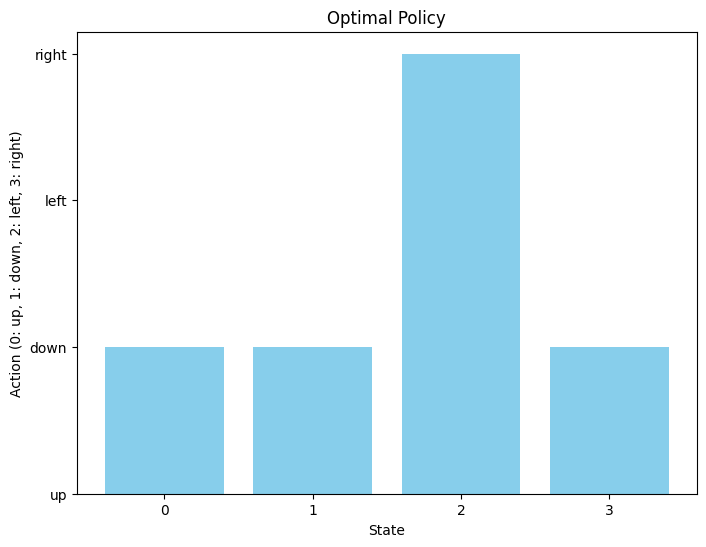

In [ ]:
# Plot the optimal policy as a bar chart
def plot_policy(policy):
    state_keys = list(policy.keys())
    action_values = list(policy.values())

    # Convert actions to numerical indices for plotting
    action_indices = [actions.index(a) for a in action_values]

    plt.figure(figsize=(8, 6))
    plt.bar(state_keys, action_indices, color='skyblue')
    plt.title('Optimal Policy')
    plt.xlabel('State')
    plt.ylabel('Action (0: up, 1: down, 2: left, 3: right)')
    plt.xticks(state_keys)
    plt.yticks([0, 1, 2, 3], ['up', 'down', 'left', 'right'])
    plt.show()

# Call function to plot the policy
plot_policy(policy)


##(c) Plot the Accumulated Rewards:

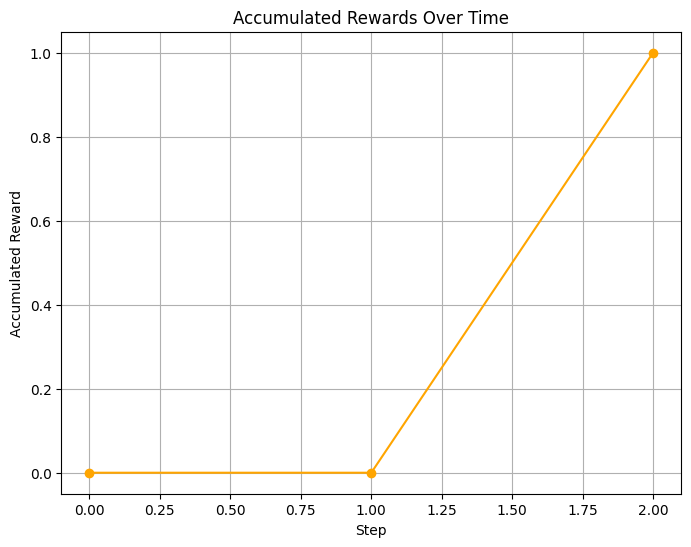

In [ ]:
# Plot the accumulated rewards over time
def plot_accumulated_rewards(accumulated_rewards):
    plt.figure(figsize=(8, 6))
    plt.plot(accumulated_rewards, marker='o', linestyle='-', color='orange')
    plt.title('Accumulated Rewards Over Time')
    plt.xlabel('Step')
    plt.ylabel('Accumulated Reward')
    plt.grid()
    plt.show()

# Call function to plot accumulated rewards
plot_accumulated_rewards(accumulated_rewards)


# Bandit Problem

Problem Description
You have 10 slot machines (arms), and each machine has a changing probability distribution for the reward it gives when you pull the lever. Your goal is to maximize your total reward by deciding which arm to pull at each time step. The problem is non-stationary because the reward distribution for each arm changes slightly over time.

Code Structure
The environment simulates the 10-armed bandit, where each arm’s reward drifts over time.
The agent interacts with the environment using an epsilon-greedy strategy to balance exploration (trying new arms) and exploitation (choosing the best-known arm).
You can switch between two methods for updating action value estimates: sample-average and constant step-size.

Explanation:
Bandit Environment: The function create_bandit() initializes the true action values for the bandit arms. The rewards change over time using a small Gaussian drift.
Action Selection: The epsilon_greedy_action() function decides whether to explore or exploit based on the epsilon value.
Update Methods:
sample_average_update() updates the action-value estimates using the average of all observed rewards.
constant_step_size_update() uses a fixed step-size for the update.
Run Experiment: The run_bandit_experiment() function simulates the bandit for a specified number of steps using the chosen method.
Results Plot: The function plot_results() plots the average reward over time for both methods, allowing you to compare their performance.

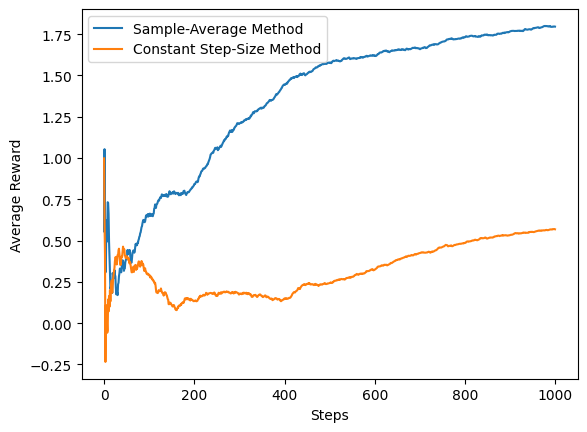

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the non-stationary 10-armed bandit environment
def create_bandit(k=10):
    """Initialize the non-stationary bandit with k arms."""
    q_true = np.random.normal(0, 1, k)  # True action values
    return q_true

def pull_arm(q_true, action):
    """Simulate pulling an arm in the bandit and getting a reward."""
    reward = np.random.normal(q_true[action], 1)  # Gaussian reward around true value
    q_true += np.random.normal(0, 0.01, len(q_true))  # Non-stationary drift
    return reward, q_true

# Define the agent's behavior with epsilon-greedy policy
def epsilon_greedy_action(q_estimates, epsilon):
    """Choose an action using epsilon-greedy strategy."""
    if np.random.rand() < epsilon:
        return np.random.choice(len(q_estimates))  # Exploration
    else:
        return np.argmax(q_estimates)  # Exploitation

# Sample-average update method
def sample_average_update(q_estimates, action, reward, action_counts):
    """Update action-value estimate using sample-average method."""
    action_counts[action] += 1
    q_estimates[action] += (reward - q_estimates[action]) / action_counts[action]
    return q_estimates, action_counts

# Constant step-size update method
def constant_step_size_update(q_estimates, action, reward, alpha=0.1):
    """Update action-value estimate using constant step-size method."""
    q_estimates[action] += alpha * (reward - q_estimates[action])
    return q_estimates

# Running the experiment
def run_bandit_experiment(steps=1000, k=10, epsilon=0.1, method='sample_average', alpha=None):
    q_true = create_bandit(k)
    q_estimates = np.zeros(k)
    action_counts = np.zeros(k)
    rewards = []

    for step in range(steps):
        action = epsilon_greedy_action(q_estimates, epsilon)
        reward, q_true = pull_arm(q_true, action)
        rewards.append(reward)

        if method == 'sample_average':
            q_estimates, action_counts = sample_average_update(q_estimates, action, reward, action_counts)
        elif method == 'constant_step_size':
            q_estimates = constant_step_size_update(q_estimates, action, reward, alpha)

    return np.array(rewards)

# Plot the results of the experiment
def plot_results(steps, rewards_sample_average, rewards_constant_step):
    """Plot the average rewards over time for both methods."""
    plt.plot(np.arange(steps), np.cumsum(rewards_sample_average) / np.arange(1, steps+1), label='Sample-Average Method')
    plt.plot(np.arange(steps), np.cumsum(rewards_constant_step) / np.arange(1, steps+1), label='Constant Step-Size Method')
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.legend()
    plt.show()

# Run and compare the two methods
steps = 1000
rewards_sample_average = run_bandit_experiment(steps=steps, method='sample_average')
rewards_constant_step = run_bandit_experiment(steps=steps, method='constant_step_size', alpha=0.1)

plot_results(steps, rewards_sample_average, rewards_constant_step)
